In [2]:
import numpy as np

### Create array

In [11]:
a = np.arange(0,60,10)
print("a = ",a)
b = a.reshape(-1,1)
print("b = ",b)
c = b+np.arange(0,6)
print("c = ",c)

a =  [ 0 10 20 30 40 50]
b =  [[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
c =  [[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


### Structure array

In [13]:
persontype = np.dtype({
    "names":["name","age","weight"],
    "formats":["S32","i","f"]
})

a = np.array([("Hana",19,50),("Ayaya",20,60)],dtype=persontype)
print(a)

[(b'Hana', 19, 50.) (b'Ayaya', 20, 60.)]


In [18]:
c = a[0]
c["name"]="D.Va"
print(c)
print(c["name"])

b = a["age"]
print(b)
b[1]=21
print(a[1]["age"])

(b'D.Va', 19, 50.)
b'D.Va'
[19 21]
21


In [22]:
print(a)
a.tofile("StructureArray.txt")

[(b'D.Va', 19, 50.) (b'Ayaya', 21, 60.)]


### Universal function

In [28]:
import time

x = [i*0.001 for i in range(1000000)]
x = np.array(x)
start = time.time()
np.sin(x,x)
print("np.sin: ",time.time()-start)

np.sin:  0.022938013076782227


In [31]:
a = np.arange(0,4)
print(a)
b = np.arange(1,5)
print(b)
c = np.add(a,b)
print(c)
np.add(a,b,a)
print(a)

[0 1 2 3]
[1 2 3 4]
[1 3 5 7]
[1 3 5 7]


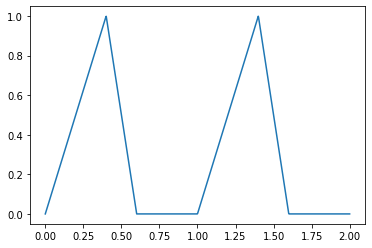

In [34]:
import matplotlib.pyplot as plt
def triangle_wave(x,c,c0,hc):
    """
    Input
        x: coord
        c: wavelength
        c0: wavelength 'till peak
        hc: amp
    
    Output
        r: single value on triangle wave
    """
    x = x-int(x)
    if x>=c:
        r = 0.0
    elif x<c0:
        r = x/c0*hc
    else:
        r = (c-x)/(c-c0)*hc
    return r

x = np.linspace(0,2,1000)
y = np.array([triangle_wave(t,0.6,0.4,1.0) for t in x])
plt.plot(x,y)
plt.show()

In the last cell we used a list to contain all the triangle
    wave values we want and then plot the waveform. Yet this 
    method is not efficient for multi-dimensional matrix. Thus,
    in this cell we will be using frompyfunc() and lambda

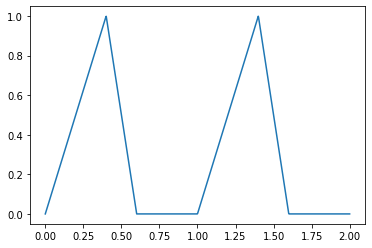

In [44]:
triangle_ufunc = np.frompyfunc(
    lambda x: triangle_wave(x,0.6,0.4,1.0),1,1)
y2 = triangle_ufunc(x)
plt.plot(x,y2)
plt.show()

frompyfunc(func,n_in,n_out),in which n_in is the number
    of input and n_out is the number of output/return value.
    For triangle_wave(),we only have one input because in 
    this case our c, c0, hc are constant and we only need to 
    input our x values. So we uses lambda function so that
    we only need to have one input for triangle_wave()

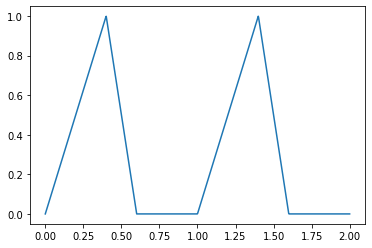

In [45]:
def triangle_func(c,c0,hc):
    def trifunc(x):
        x = x-int(x)
        if x>=c:
            r = 0.0
        elif x<c0: 
            r = x/c0*hc
        else: 
            r = (c-x)/(c-c0)*hc
        return r
    return np.frompyfunc(trifunc,1,1)

y2 = triangle_func(0.6,0.4,1.0)(x)
plt.plot(x,y2)
plt.show()

In this cell we used the function triangle_func() to transfer the three variables c, c0, hc, and inside this function we defined trifunc() to compute the triangle wave with one input which is the x value. trifunc(), when executing, will use triangle_func()'s variables to do the calculations and return the results to triangle